In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
xl_path = r'../Final_Four_Experiments_Combined_20240418.xlsx'
os.path.exists(xl_path)

True

In [3]:
stresses = ['Gm', 'Drought', 'Nutrient_Deficiency', 'Fs', 'Salinity']

In [4]:
df = pd.read_excel(xl_path, sheet_name='Combined_Estimated_Traits')

In [5]:
len(df)

1032

In [8]:
dfs = pd.read_excel(xl_path, [1,2])

In [10]:
for i in dfs.keys():
    dfs[i].drop(columns=stresses, errors='ignore', inplace=True)
    dfs[i].rename(columns=dict(zip([s + '.1' for s in stresses], stresses)), inplace=True)

In [19]:
df = dfs[1].join(dfs[2], how='left', lsuffix='_')

In [20]:
df.drop(columns=[s for s in df.columns if (s[-1] == '_')], inplace=True)

In [19]:
df.rename(columns=dict(zip([s + '.1' for s in stresses], stresses)), inplace=True)

In [20]:
trait_cols = np.array(['Photo',
       'Ci', 'Cond', 'CTleaf', 'Trmmol', 'WUEi', 'WUEin', 'Fv_Fm', 'Fv_Fo',
       'PI', 'SLA', 'LWC', 'Suc', 'OP', 'OP100', 'RWC', 'WP', 'N', 'C',
       'Neoxanthin', 'Violaxanthin', 'Lutein', 'Zeaxanthin', 'Chl_b', 'Chl_a',
       'B_carotene', 'Glucose', 'Fructose', 'Sucrose', 'Sugars', 'Starch',
       'Ellagic', 'Gal', 'Rut', 'CTs'])

In [21]:
prop_pos = (df[trait_cols].values > 0).sum(axis=0) / len(df)
sel = (prop_pos > .7)
dict(zip(trait_cols[sel], prop_pos[sel]))

{'Photo': 0.9447674418604651,
 'Ci': 1.0,
 'Cond': 0.9476744186046512,
 'CTleaf': 1.0,
 'Trmmol': 0.9680232558139535,
 'WUEi': 0.9941860465116279,
 'WUEin': 0.9961240310077519,
 'Fv_Fm': 1.0,
 'Fv_Fo': 1.0,
 'PI': 0.9961240310077519,
 'SLA': 1.0,
 'LWC': 1.0,
 'Suc': 1.0,
 'RWC': 1.0,
 'N': 1.0,
 'C': 1.0,
 'Neoxanthin': 0.8536821705426356,
 'Violaxanthin': 0.752906976744186,
 'Lutein': 0.9680232558139535,
 'Zeaxanthin': 0.9534883720930233,
 'Chl_b': 0.9437984496124031,
 'Chl_a': 0.9806201550387597,
 'B_carotene': 0.9457364341085271,
 'Glucose': 0.9864341085271318,
 'Fructose': 0.999031007751938,
 'Sucrose': 0.9932170542635659,
 'Sugars': 1.0,
 'Starch': 0.8653100775193798,
 'Ellagic': 0.8381782945736435,
 'Gal': 0.9699612403100775,
 'Rut': 0.997093023255814,
 'CTs': 0.9883720930232558}

In [22]:
sel_n = (prop_pos < .3)
dict(zip(trait_cols[sel_n], prop_pos[sel_n]))

{'OP': 0.0, 'OP100': 0.0, 'WP': 0.035852713178294575}

In [43]:
df

,Experimentl,Timel,Speciesl,Soill,Gml,Droughtl,Nutrient_Deficiencyl,Fsl,Salinityl,Fungal_infectionl,...,B_carotene,Glucose,Fructose,Sucrose,Sugars,Starch,Ellagic,Gal,Rut,CTs
0,2018_EEL,0,Black Walnut,F,0,0,0,0,0,0,...,180.672913,4.114120,4.321044,2.106877,10.377295,2.430284,215.327766,123.012942,37.911137,16.153354
1,2018_EEL,0,Black Walnut,P,0,0,0,0,0,0,...,180.387969,6.890071,4.767853,2.620891,12.494023,4.207401,207.391468,101.176491,15.959794,12.635958
2,2018_EEL,0,Black Walnut,S,0,0,0,0,0,0,...,139.376769,6.141986,4.895065,1.737587,12.856270,4.045341,200.776794,108.215802,25.356704,18.786917
3,2018_EEL,0,Black Walnut,F,0,0,0,0,0,0,...,185.691351,5.253359,4.398900,2.090093,10.430779,1.620732,159.648059,140.224392,34.913800,12.904982
4,2018_EEL,0,Black Walnut,P,0,0,0,0,0,0,...,196.558159,5.581466,4.352770,1.709887,9.581343,2.576192,131.300118,147.015321,35.777785,12.665249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2019_Martell,2,Red Oak,NaN,0,0,0,0,1,0,...,11.266166,0.839294,2.183542,2.365718,5.722241,0.596050,311.728885,39.374667,34.287740,1.880939
1028,2019_Martell,2,Red Oak,NaN,0,0,1,0,0,0,...,17.265337,0.996579,2.409287,1.564139,6.454968,-0.798146,208.325464,63.612114,38.578984,1.816828
1029,2019_Martell,2,Red Oak,NaN,0,0,0,0,0,0,...,-13.942312,1.987383,1.724018,1.511989,6.660840,-0.283068,154.492481,85.725803,23.500853,8.011501
1030,2019_Martell,2,Red Oak,NaN,0,0,1,0,1,0,...,-4.849582,0.689076,2.267618,1.728550,5.283917,-0.866526,287.344848,61.481795,35.085843,5.946429


(array([  1.,   0.,   0.,   0.,   0.,   4.,   2.,  11.,  38., 104., 264.,
        324., 120.,  17.,   6.,   9.,  26.,  50.,  39.,  17.]),
 array([-4.12131201, -3.72735809, -3.33340417, -2.93945025, -2.54549633,
        -2.15154241, -1.75758849, -1.36363457, -0.96968065, -0.57572673,
        -0.18177281,  0.21218111,  0.60613503,  1.00008895,  1.39404287,
         1.78799679,  2.18195071,  2.57590463,  2.96985854,  3.36381246,
         3.75776638]),
 <BarContainer object of 20 artists>)

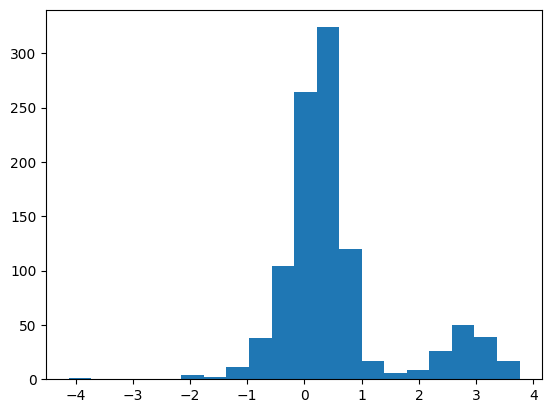

In [23]:
plt.hist(df['Violaxanthin'], bins=20)

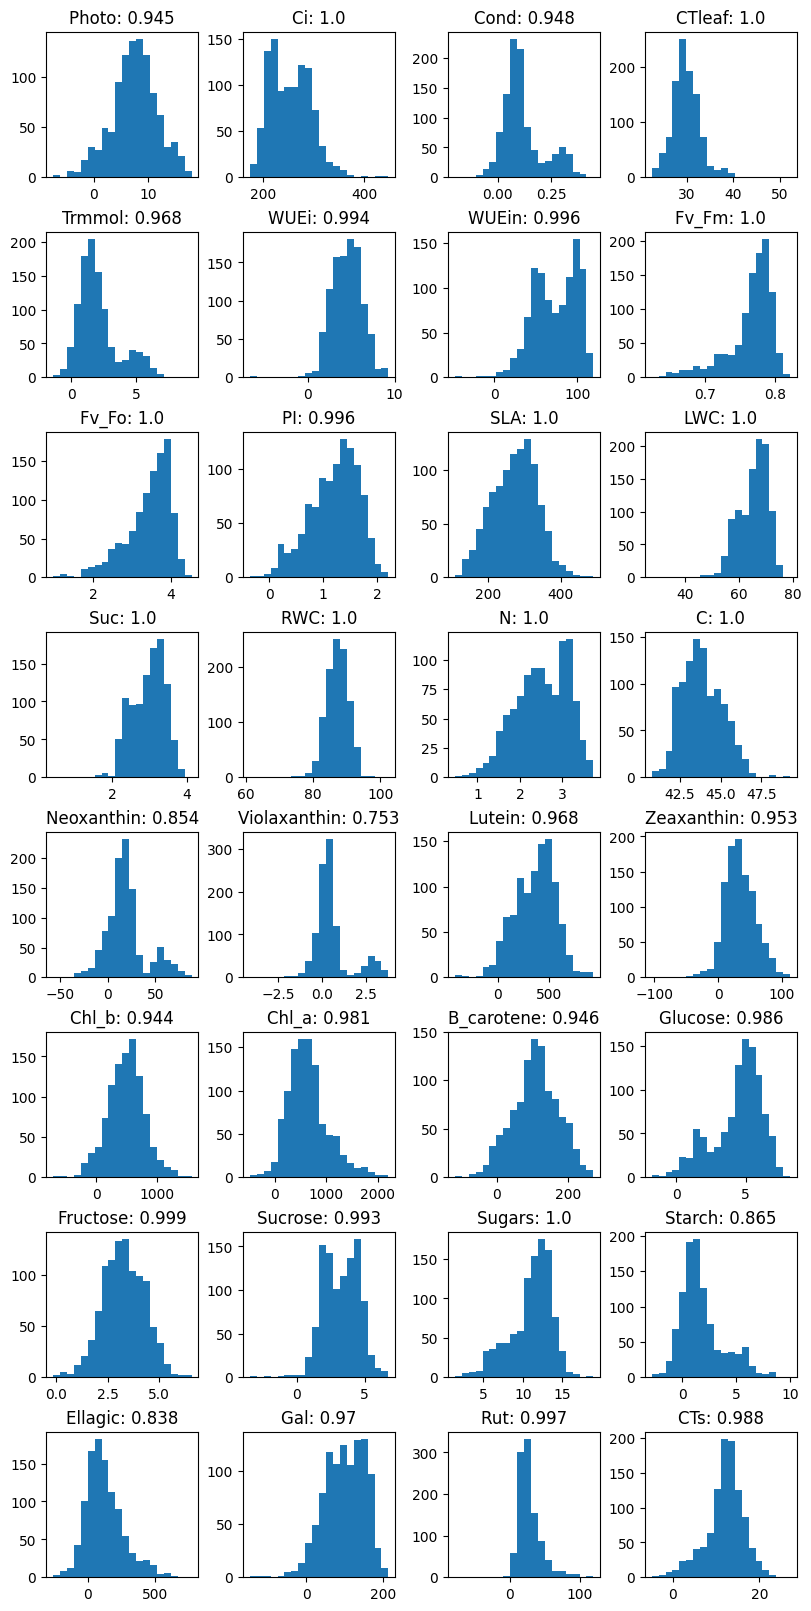

In [24]:
fig, ax_rows = plt.subplots(8, 4, constrained_layout=True, figsize=(8,16))

i = 0

for row in ax_rows:
    for ax_col in row:
        ax_col.hist(df[trait_cols[sel][i]], bins=20)
        ax_col.set_title(f'{trait_cols[sel][i]}: {round(prop_pos[sel][i], 3)}')

        i += 1

In [40]:
(df['OP'] > df['WP']).mean()

0.32073643410852715